In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Read the image
img = cv2.imread("butterfly.jpg")

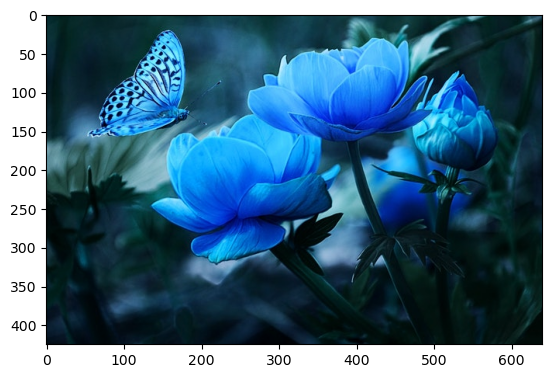

In [4]:
# Display the image
plt.imshow(img)

In [5]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(425, 640, 3)


#### This shows that the image is in numpy nd-array.
#### The image consists of 425 rows, 640 columns and 3 color values.

In [6]:
# Let's print the color of the pixel in row 25 and column 10
print(img[25,10])

[10 48 50]


#### [10,48,50] --> These are the brightnesses of Blue, Green and Red components that can be used to compose the color of the pixel.

<function matplotlib.pyplot.show(close=None, block=None)>

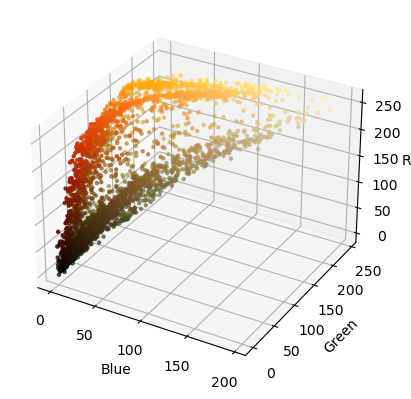

In [10]:
# Flatten the image ensuring that each row in resulting array has RGB color channels
flat = np.reshape(img, (-1,3))

# Randomly select 5000 rows from the image
idx = np.random.choice(flat.shape[0],5000)

#Select the subset of sampled data
sampled_flat = flat[idx]

# Rearrange the colors as the mapping is different in Matplotlib
# Colors should follow RGB pattern but here the output is BGR as observed above.
# Further normalize the values to be between 0 and 1 by dividing by 255.0
colors = sampled_flat[:,[2,1,0]]/255.0

# Display a 3d image of the sample in Matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(
    sampled_flat[:,0],
    sampled_flat[:,1],
    sampled_flat[:,2],
    c = colors,
    marker = "."
)
ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
plt.show




In [11]:
# Implemention k-means to segement the RGB color pixels of the image
K = 5

# In general we stop when the centroids stop changing. since we have huge dataset
# I am setting the stooping criteria on the basis of Epsilon and Maximum iteration
criteria = (cv2.TermCriteria_EPS + cv2.TERM_CRITERIA_MAX_ITER, 250, 1.0)
ssd , bestLabels , centers = cv2.kmeans(
    data = flat.astype(np.float32), # to make the datatype consistent for Opencv
    K = K,
    bestLabels = None,
    criteria = criteria,
    attempts = 10,
    flags = cv2.KMEANS_RANDOM_CENTERS
)

<function matplotlib.pyplot.show(close=None, block=None)>

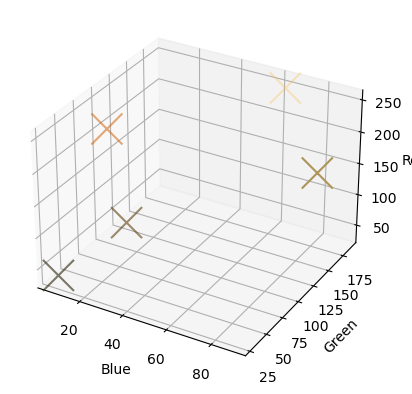

In [13]:
#Display color clusters and segmentation.
colors = centers[:,[2,1,0]]/255.0

# Display a 3d image of the sample in Matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(
    centers[:,0],
    centers[:,1],
    centers[:,2],
    c = colors,
    marker = "x", s = 500
)
ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
plt.show


In [14]:
print(centers)

[[  7.7039456  97.65574   208.9844   ]
 [ 89.00881   148.24298   173.16823  ]
 [ 24.79233    71.890236  100.742676 ]
 [ 63.528183  186.15964   249.7555   ]
 [  6.0940332  29.949226   36.610256 ]]


In [16]:
centers = centers.astype(np.uint8)
print(centers)

[[  7  97 208]
 [ 89 148 173]
 [ 24  71 100]
 [ 63 186 249]
 [  6  29  36]]


In [17]:
print(bestLabels)

[[4]
 [4]
 [4]
 ...
 [4]
 [4]
 [4]]


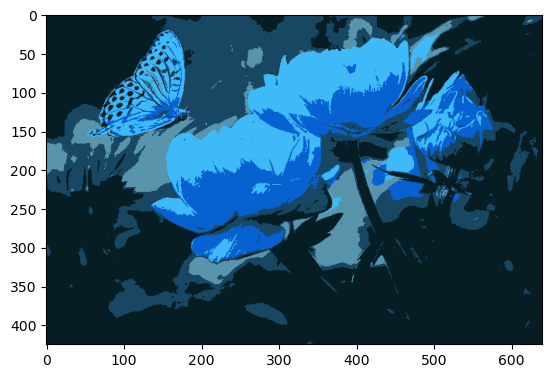

In [18]:
segmented_flat = centers[bestLabels]
segmented_image = segmented_flat.reshape(img.shape)
plt.imshow(segmented_image)

#### Elbow Method

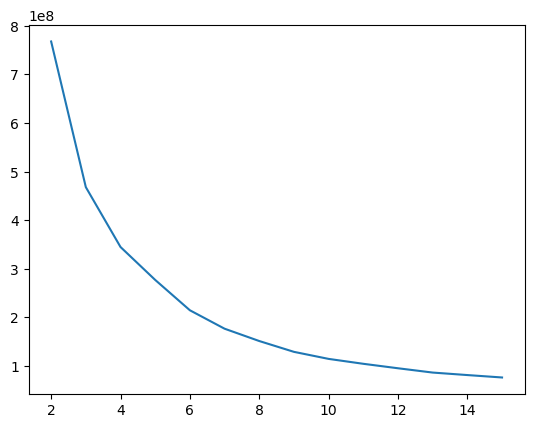

In [19]:
# Optimize the value of k
# K is the number of clusters we look for.

Ks = []
distances = []
criteria = (cv2.TermCriteria_EPS + cv2.TERM_CRITERIA_MAX_ITER, 250, 1.0)

for K in range(2,16):
    ssd , bestLabels , centers = cv2.kmeans(
            data = flat.astype(np.float32), # to make the datatype consistent for Opencv
            K = K,
            bestLabels = None,
            criteria = criteria,
            attempts = 10,
            flags = cv2.KMEANS_RANDOM_CENTERS
        )
    Ks.append(K)
    distances.append(ssd)
plt.plot(Ks,distances)
plt.show()    
        